In [2]:
from helpers import *
from tqdm import notebook

In [3]:
df = pd.read_csv("data/eil51.tsp.txt", skiprows=6, names=["id", "x", "y"], header=None, delimiter = ' ', index_col=0).drop("EOF")

In [ ]:
df.plot.scatter("x", "y")

In [4]:
sim = AnnealTVS(df, K = 100, num_sim=40,stopK = 0.001, alpha = 0.98, elementary="insert", verbose=True)

In [5]:
sim.total_distance()

585.7878462385709

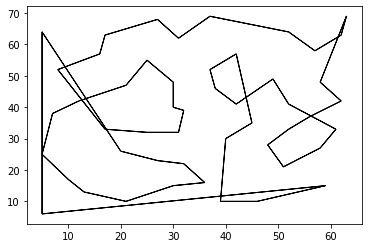

In [6]:
sim.plot_solution()

In [7]:
res = sim.run_sim()

times lowered: 66
times raised:41
times lowered: 66
times raised:62
times lowered: 57
times raised:44
times lowered: 33
times raised:24
times lowered: 22
times raised:16
times lowered: 21
times raised:15
times lowered: 14
times raised:12
times lowered: 5
times raised:7
times lowered: 4
times raised:5
times lowered: 5
times raised:7
times lowered: 7
times raised:9
times lowered: 2
times raised:13
times lowered: 4
times raised:12
times lowered: 4
times raised:11
times lowered: 1
times raised:13
times lowered: 5
times raised:14
times lowered: 2
times raised:8
times lowered: 0
times raised:11
times lowered: 2
times raised:6
times lowered: 4
times raised:7
times lowered: 1
times raised:8
times lowered: 3
times raised:12
times lowered: 2
times raised:6
times lowered: 3
times raised:8
times lowered: 1
times raised:10
times lowered: 2
times raised:10
times lowered: 0
times raised:10
times lowered: 3
times raised:7
times lowered: 0
times raised:9
times lowered: 3
times raised:8
times lowered: 6

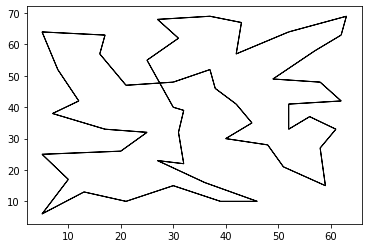

In [8]:
sim.plot_solution()

In [9]:
sim.total_distance()

459.25803177161936

In [ ]:
def runsims(temp = 10, element="swap"):
    sim = AnnealTVS(df, K = temp, stopK = 0.000001, alpha = 0.95, elementary=element)
    res = sim.run_sim()
    return res

def plot_solution(solution):
    for i in range(len(solution)-1):
        fro = df.loc[solution[i]]
        to = df.loc[solution[i+1]]
        plt.arrow(fro["x"], fro["y"], to["x"]-fro["x"], to["y"]-fro["y"])
    fro = df.loc[solution[len(solution)-1]]
    to = df.loc[solution[0]]
    plt.arrow(fro["x"], fro["y"], to["x"]-fro["x"], to["y"]-fro["y"])

In [ ]:
num_sims = 10
results_sims= Parallel(n_jobs=8)(delayed(runsims)()
                                      for i in range(num_sims))

In [ ]:
best_sol = results_sims[9][8][0]

In [ ]:
plot_solution(best_sol)

In [ ]:
num_sims = 10
results_sims= Parallel(n_jobs=8)(delayed(runsims)(temp=i+1, element="swap")
                                      for i in range(num_sims))

In [ ]:
results_sims